<a href="https://colab.research.google.com/github/Jangwanko/AI_study/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
import tensorflow
if not os.path.exists("./gan_images"):
    os.makedirs("./gan_images")
np.random.seed(3)
tensorflow.random.set_seed(3)

In [ ]:
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

In [ ]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

In [ ]:
ginput=Input(shape=(100,))
dis_output=discriminator(generator(ginput))
gan=Model(ginput,dis_output)
gan.compile(loss='binary_crossentropy',optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 28, 28, 1)         865281    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 212865    
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


epoch:0  d_loss:0.6618 g_loss=0.0759
epoch:1  d_loss:0.5550 g_loss=0.1684
epoch:2  d_loss:0.5030 g_loss=0.3891
epoch:3  d_loss:0.4974 g_loss=0.6034
epoch:4  d_loss:0.4951 g_loss=0.7691
epoch:5  d_loss:0.4794 g_loss=0.8515
epoch:6  d_loss:0.4605 g_loss=0.9250
epoch:7  d_loss:0.4433 g_loss=0.9000
epoch:8  d_loss:0.4128 g_loss=0.9475
epoch:9  d_loss:0.4417 g_loss=0.9776
epoch:10  d_loss:0.4991 g_loss=1.1308
epoch:11  d_loss:0.4233 g_loss=1.0956
epoch:12  d_loss:0.5594 g_loss=1.1572
epoch:13  d_loss:0.6074 g_loss=0.9784
epoch:14  d_loss:0.6057 g_loss=0.7908
epoch:15  d_loss:0.5436 g_loss=0.8283
epoch:16  d_loss:0.4936 g_loss=0.7970
epoch:17  d_loss:0.4869 g_loss=0.7135
epoch:18  d_loss:0.4064 g_loss=0.9311
epoch:19  d_loss:0.5102 g_loss=0.7419
epoch:20  d_loss:0.4279 g_loss=0.7403
epoch:21  d_loss:0.5013 g_loss=0.6802
epoch:22  d_loss:0.4574 g_loss=0.7439
epoch:23  d_loss:0.5302 g_loss=0.8451
epoch:24  d_loss:0.3946 g_loss=0.8501
epoch:25  d_loss:0.4615 g_loss=0.7404
epoch:26  d_loss:0.430

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


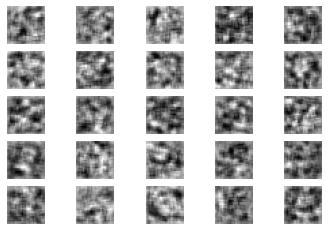

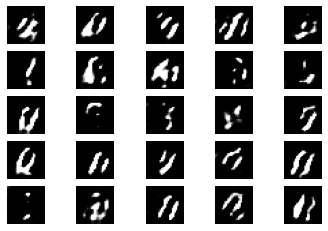

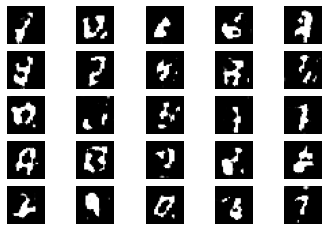

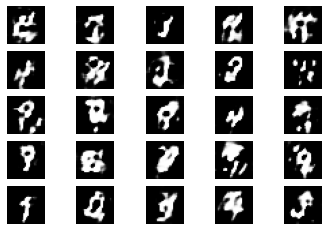

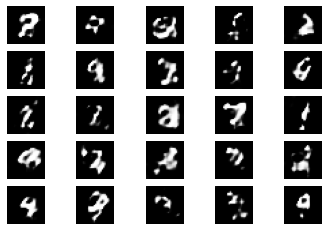

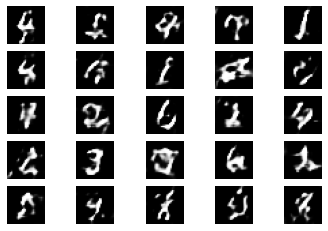

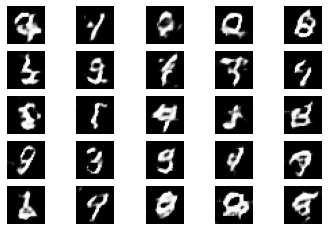

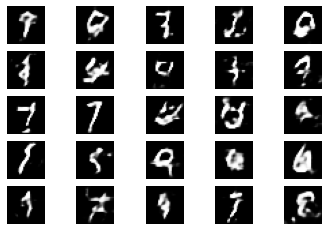

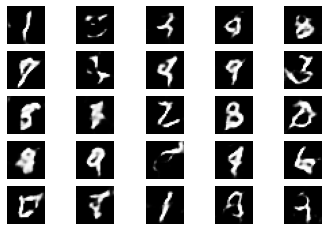

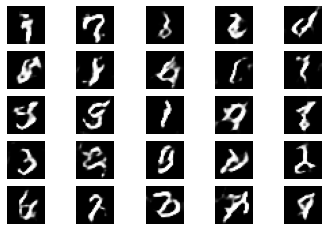

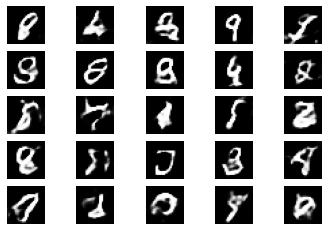

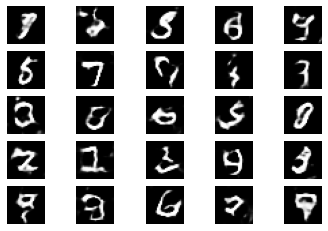

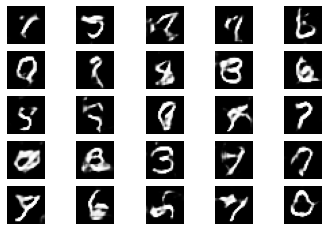

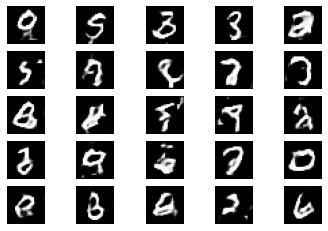

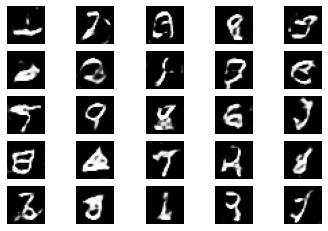

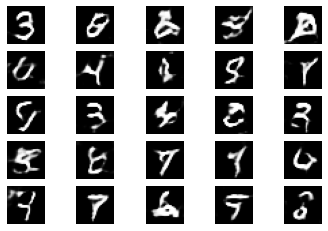

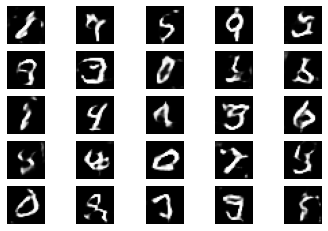

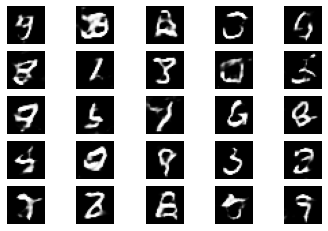

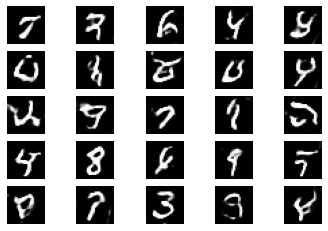

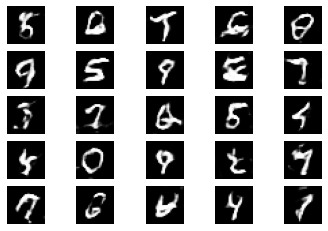

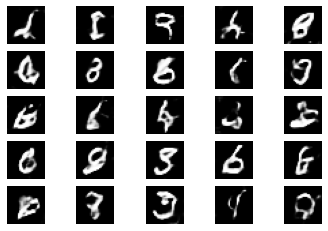

In [ ]:
def gan_train(epoch, batch_size, saving_interval):
  (X_train,_ ),(_,_)=mnist.load_data()
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5
  true=np.ones((batch_size,1))
  fake=np.zeros((batch_size,1))
  
  for i in range(epoch):
    idx=np.random.randint(0,X_train.shape[0],batch_size)
    imgs=X_train[idx]
    d_loss_real=discriminator.train_on_batch(imgs,true)
    
    noise=np.random.normal(0,1,(batch_size,100))
    gen_imgs=generator.predict(noise)
    d_loss_fake=discriminator.train_on_batch(gen_imgs,fake)

    d_loss=0.5*np.add(d_loss_real,d_loss_fake)
    g_loss=gan.train_on_batch(noise,true)

    print('epoch:%d '%i, 'd_loss:%.4f'%d_loss, 'g_loss=%.4f'%g_loss)

    if i%saving_interval==0:
      noise=np.random.normal(0,1,(25,100))
      gen_imgs=generator.predict(noise)

      gen_imgs=0.5*gen_imgs+0.5

      fig, axs=plt.subplots(5,5)
      count=0
      for j in range(5):
        for k in range(5):
          axs[j,k].imshow(gen_imgs[count, :, :,0],cmap='gray')
          axs[j,k].axis('off')
          count+=1
      fig.savefig("gan_images/gan_mnist_%d.png"%i)

gan_train(4001,32,200)